<a href="https://colab.research.google.com/github/MIrfaanA/load-shortfall-regression-predict-api/blob/master/Group_13_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

#Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression 


#Model Evaluation 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Display
from ipywidgets import interact, IntSlider
from IPython.display import display


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [ ]:
df_train =pd.read_csv('https://raw.githubusercontent.com/MIrfaanA/load-shortfall-regression-predict-api/master/Project/Advanced-Regression-Starter-Data/df_train.csv',index_col=0)
df_test=pd.read_csv('https://raw.githubusercontent.com/MIrfaanA/load-shortfall-regression-predict-api/master/Project/Advanced-Regression-Starter-Data/df_test.csv') 

In [ ]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


### 2.1 Merge Data


In [ ]:
df=pd.concat([df_train, df_test])

<a id="three"></a>
## 3. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The dataset will be cleaned and new features created. Note that we will call this DataFrame 'clean_df'

In [ ]:



df_clean=df

### 3.1 Data Types

In order to analyse Data for regression we have to see what data types there are in the columns. Ideally we would want integers and/or floats.

In [ ]:


df_clean.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

There are three columns (time, Seville_pressure, Valencia_wind_deg) that are of theobjects type. Lets view these columns:

In [ ]:
object_df= df_clean[['Valencia_wind_deg','Seville_pressure','time']]

In [ ]:
object_df.head()

,Valencia_wind_deg,Seville_pressure,time
0,level_5,sp25,2015-01-01 03:00:00
1,level_10,sp25,2015-01-01 06:00:00
2,level_9,sp25,2015-01-01 09:00:00
3,level_8,sp25,2015-01-01 12:00:00
4,level_7,sp25,2015-01-01 15:00:00


### 3.2 Transforming data to float or integer

In these section we will transform the data types mentioned above fill null values and also convert the time data to a usable format





#### 3.2.1 Converting Column Data Types



*   *Time Column*



In [ ]:
df_clean['time'] = pd.to_datetime(df_clean['time'])

We will also seperate that time column values in to hours, days and months using the following code below:

In [ ]:
df_clean['new_time']=[d.time() for d in df_clean['time']]
df_clean['new_date']=[d.date() for d in df_clean['time']]
df_clean['month'] = df_clean.time.dt.month
df_clean['day']=df_clean.time.dt.day
df_clean['hour']=df_clean.time.dt.time
df_clean=df_clean.drop(columns=['new_time','new_date'])
df_clean['hours'] = df_clean['hour'].astype(str)
df_clean['hours'] = df_clean['hours'].str[:2]
df_clean['hours']=df_clean['hours'].astype(int)
df_clean=df_clean.drop(columns=['hour'])



*   *Valencia wind degree*




Looking at the Valencia_wind_deg column. They are represented in levels. These levels can be converted to integers by including the number only.

In [ ]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

We can now convert the columns to a numeric column

In [ ]:
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [ ]:
df_clean.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Unnamed: 0,month,day,hours
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,NaN,1,1,3
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,NaN,1,1,6
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,NaN,1,1,9
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,NaN,1,1,12
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,NaN,1,1,15




*   Seville Pressure




We can also convert the Seville pressure to a numeric type by first extracting the numbers and then converting it to a numeric type


In [ ]:
df_clean['Seville_pressure'] = df_clean.Seville_pressure.str.extract('(\d+)')


In [ ]:
df_clean.Seville_pressure = pd.to_numeric(df_clean.Seville_pressure)

In [ ]:
df_clean['Seville_pressure'].head()

0    25
1    25
2    25
3    25
4    25
Name: Seville_pressure, dtype: int64


### 3.2.2 Filling Null Values




Lets have a look at the data to determine if there are any null values

In [ ]:
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

The Valencia Pressure column is the only one with the null values. Obtaining the summary statistics related to that column will allow us to fill the rows with relevant values

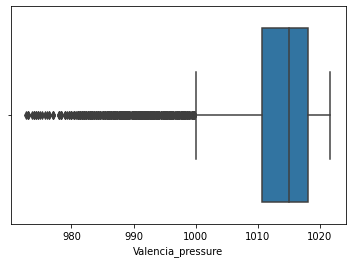

In [ ]:
sns.boxplot(df['Valencia_pressure'])

Looking at the box blot we see that most of the values lie between 1000 and approximately 1030. Looking at thebox plot and the summary statistics column above we can replace the null values with either mean, mode or median. It is decided that the null values will be replaced with the median

In [ ]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

Confirm if there are any null values in the train and test data set:

In [ ]:
df_clean.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

Note that the load_shortfall_3h column has null values. This is because those rows form part of the test data. All columns are now of the same data types and the relevant null values filled in. These steps performed are basic cleaning steps. Further manipulation of the data can now be performed if needed

Drop the unamed columns as well

In [ ]:
df_clean = df_clean.drop(['Unnamed: 0'],axis = 1)

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [ ]:
# look at data statistics

In [ ]:
# plot relevant feature interactions

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data
df_rfr=df_clean
y = df_rfr[:len(df_train)][['load_shortfall_3h']]
X = df_rfr[:len(df_train)].drop(['load_shortfall_3h','time'],axis=1)

In [ ]:
# create targets and features dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=10)

# Random Forrest Model

In [ ]:
# create one or more ML models
rfr = RandomForestRegressor()

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)
preds = CV_rfc.predict(X_test)

# XGboost Model

In [ ]:
df_xgb=df_clean

reg = XGBRegressor(booster='gbtree',n_estimators = 2000, reg_lambda=1,gamma=0, max_depth = 3)

reg.fit(X_train, y_train)
preds_boost = reg.predict(X_test)

[14:59:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Linear Regression model

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)
preds_Lin = lr.predict(X_test)

# Decision Tree Model

In [ ]:
regr_tree = DecisionTreeRegressor(random_state=42)
regr_tree.fit(X_train, y_train)
y_pred_regr_tree = regr_tree.predict(X_test)

# Lasso Regression

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression

In [ ]:
rdg = Ridge()
rdg.fit(X_train, y_train)
y_pred_rdg = rdg.predict(X_test)

For model evaluation, two functions(RMSE and R^2 evaluation metrics were used)

In [ ]:
# evaluate one or more ML models
def rmse(y_test, y_predict):
  return np.sqrt(mean_squared_error(y_test, y_predict))


In [ ]:
RMSE_df = pd.DataFrame({'Linear Regression': rmse(y_test, preds_Lin),
                        'Lasso Regression': rmse(y_test, y_pred_lasso),
                        'Ridge Regression': rmse(y_test, y_pred_rdg), 
                        'Random Forrest Regression': rmse(y_test, preds), 
                        'Decision Tree Regression': rmse(y_test, y_pred_regr_tree), 
                        'XGBoost Regression': rmse(y_test, preds_boost)},  index= [1])
RMSE_df

,Linear Regression,Lasso Regression,Ridge Regression,Random Forrest Regression,Decision Tree Regression,XGBoost Regression
1,4838.176245,4843.320458,4840.624137,3214.186231,4717.028521,3232.476331


In [ ]:
Score_df = pd.DataFrame({'Linear Regression': r2_score(y_test, preds_Lin), 
                         'Lasso Regression': r2_score(y_test, y_pred_lasso), 
                         'Ridge Regression': r2_score(y_test, y_pred_rdg), 
                         'Random Forrest Regression': r2_score(y_test, preds), 
                         'Decision Tree Regression': r2_score(y_test, y_pred_regr_tree), 
                         'XGBoost Regression': r2_score(y_test, preds_boost)},  index= [1])
Score_df

,Linear Regression,Lasso Regression,Ridge Regression,Random Forrest Regression,Decision Tree Regression,XGBoost Regression
1,0.17058,0.168816,0.169741,0.633939,0.211597,0.629761


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance



In [ ]:
# Choose best model and motivate why it is the best choice

Based on the RMSE and R^2score, the Random Forrest Regression has the lowest RMSE of 3217.572042 and also the 63,31% accuracy based on the r^2 score.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

submission = pd.DataFrame()
submission['time'] = df_test['time']
submission['load_shortfall_3h'] =y_pred_regr_tree
submission.to_csv('Mfundo_sub.csv')

ValueError: ignored